In [1]:
## Bring in needed mods
import pandas as pd, numpy as np, scipy.stats as ss

## Load in matplot lib
from matplotlib import pyplot as plt

## Set random seed
np.random.seed(711)

In [2]:
## Load in the atac seq stats 
atac_stat = pd.read_csv('../DATA/ATAC-seq_stats.csv')
atac_stat['Experiment'] = 'ATAC' 

## H3K27ac stats 
h3k27_stat = pd.read_csv('../DATA/H3K27ac_stats.csv')
h3k27_stat['Experiment'] = 'H3K27ac'

## H3K4me3 stats 
h3k4me3_stat = pd.read_csv('../DATA/H3K4me3_stats.csv')
h3k4me3_stat['Experiment'] = 'H3K4me3'

In [3]:
## Set the order of the statistics to plot 
stats = ['Spearman','PearsonR','Rsquared','NMI']

## Set the stat lables, make sure the match above 
stat_labels = ['Spearman '+ '\u03C1', 'Pearson $R$', '$R^2$','Normalized\nMutual Information']

## Form into a dictionary
stat_label_dict = dict(zip(stats,stat_labels))

In [4]:
## View the head of the atac data 
atac_stat.head()

,Sample1,Sample2,Cozero,Isrep,PearsonR,Rsquared,NMI,Spearman,Experiment
0,ENCLB324GIU,ENCLB404SKN,True,False,0.489691,0.239798,0.241055,0.443400,ATAC
1,ENCLB324GIU,ENCLB404SKN,False,False,0.710270,0.504483,0.547970,0.767056,ATAC
2,ENCLB584REF,ENCLB404SKN,True,False,0.516603,0.266878,0.198366,0.413057,ATAC
3,ENCLB584REF,ENCLB404SKN,False,False,0.663394,0.440091,0.481283,0.717035,ATAC
4,ENCLB584REF,ENCLB324GIU,True,False,0.576110,0.331902,0.236399,0.455562,ATAC


In [5]:
atac_stat[(atac_stat.Sample2 == 'ENCLB404SKN') & (atac_stat.Sample1=='ENCLB605LCC')]

,Sample1,Sample2,Cozero,Isrep,PearsonR,Rsquared,NMI,Spearman,Experiment
12,ENCLB605LCC,ENCLB404SKN,True,True,0.881532,0.777098,0.692698,0.804573,ATAC
13,ENCLB605LCC,ENCLB404SKN,False,True,0.932060,0.868735,0.798904,0.916204,ATAC


In [6]:
## Group the stats
dfs = [atac_stat,h3k27_stat,h3k4me3_stat]

## Combine the data
comb = pd.concat(dfs)

## Print the shpae
comb.shape

(710, 9)

In [7]:
def plotswarm(x,y,color='k',alpha=0.5):
    for a,b, in zip(x,y):
        plt.plot([0,1],[a,b],'o',color=color,alpha=alpha,rasterized=True,fillstyle='none') 
        plt.plot([0,1],[a,b],'-',color=color,alpha=0.1,rasterized=True) 
    plt.ylim(0,1.05)
    pass

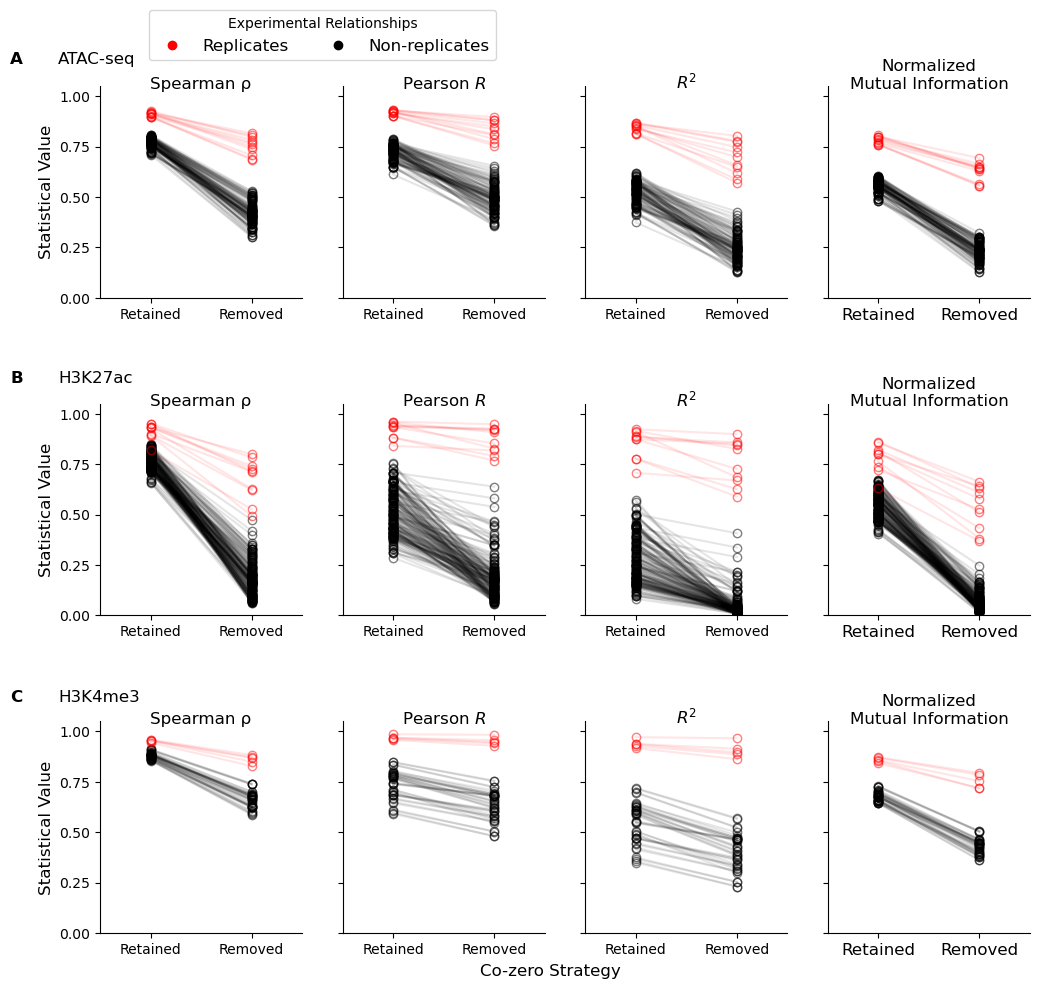

In [8]:
## Set the subplots, equal axis, with white background
fig,ax = plt.subplots(3,4,figsize=(12,11),sharex='row',sharey='row')
fig.set_facecolor('w')

## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    ## Iterate thru the stats 
    for i,s in enumerate(stats):
        ## Set the axis 
        plt.sca(ax[rix,i])
        
        ## Turn off the top and right spoines
        [ax[rix,i].spines[b].set_visible(False) for b in ('top','right')]
    
        ## Set the title
        plt.title(stat_label_dict[s],fontsize=12,y=0.95)
        
        ## Set y-axis label 
        plt.ylabel('Statistical Value' if i == 0 else None,fontsize=12)
        
        ## Format a label boolean
        tolabel = (rix + i) == 0
        
        ## Iterate thru the replicate status 
        for b in (False,True):
            
            ## Gather the x and y 
            x = results[(results.Cozero==False) & (results.Isrep==b)][s].values
            y = results[(results.Cozero==True)  & (results.Isrep==b)][s].values
    
            ## Plot the results 
            #plt.plot(x,y,'o',fillstyle='none',color='r' if b else 'k',alpha=0.5,rasterized=True)
            plotswarm(x,y,color='r' if b else 'k')
            
    ## Reset the x and y ticks
    plt.yticks(np.arange(0,1.25,0.25),fontsize=12)
    plt.xlim(-0.5,1.5)
    plt.xticks([0,1],['Retained','Removed'],fontsize=12)
    
## Add a legend
plt.sca(ax[0,0])
plt.plot(0,0.25,'ro',label='Replicates')
plt.plot(0,0.25,'ko',label='Non-replicates')
plt.plot(0,0.25,'wo',ms=10)

## Call the leged 
plt.legend(ncol=2,title='Experimental Relationships',fontsize=12,bbox_to_anchor=(2,1.4))
        
## Modify spacing 
plt.subplots_adjust(hspace=0.5)

## Add the section labels
[fig.text(x=0.05,y=0.90-(i*0.29),s=s,fontsize=12,fontweight='bold') for i,s in enumerate(('A','B','C'))]

## Add lables of experment type
[fig.text(x=0.09,y=0.9-(i*0.29),s=s,fontsize=12) for i,s in enumerate(('ATAC-seq','H3K27ac','H3K4me3'))];

## Annotate the x-axis
fig.text(x=0.5,y=0.075,s='Co-zero Strategy',fontsize=12,va='center',ha='center')

## Save the figure 
savepath = None #'../FIGURES/Figure.4.png'

## If we are saving, save
if savepath:
    plt.savefig(savepath,dpi=600,bbox_inches='tight')

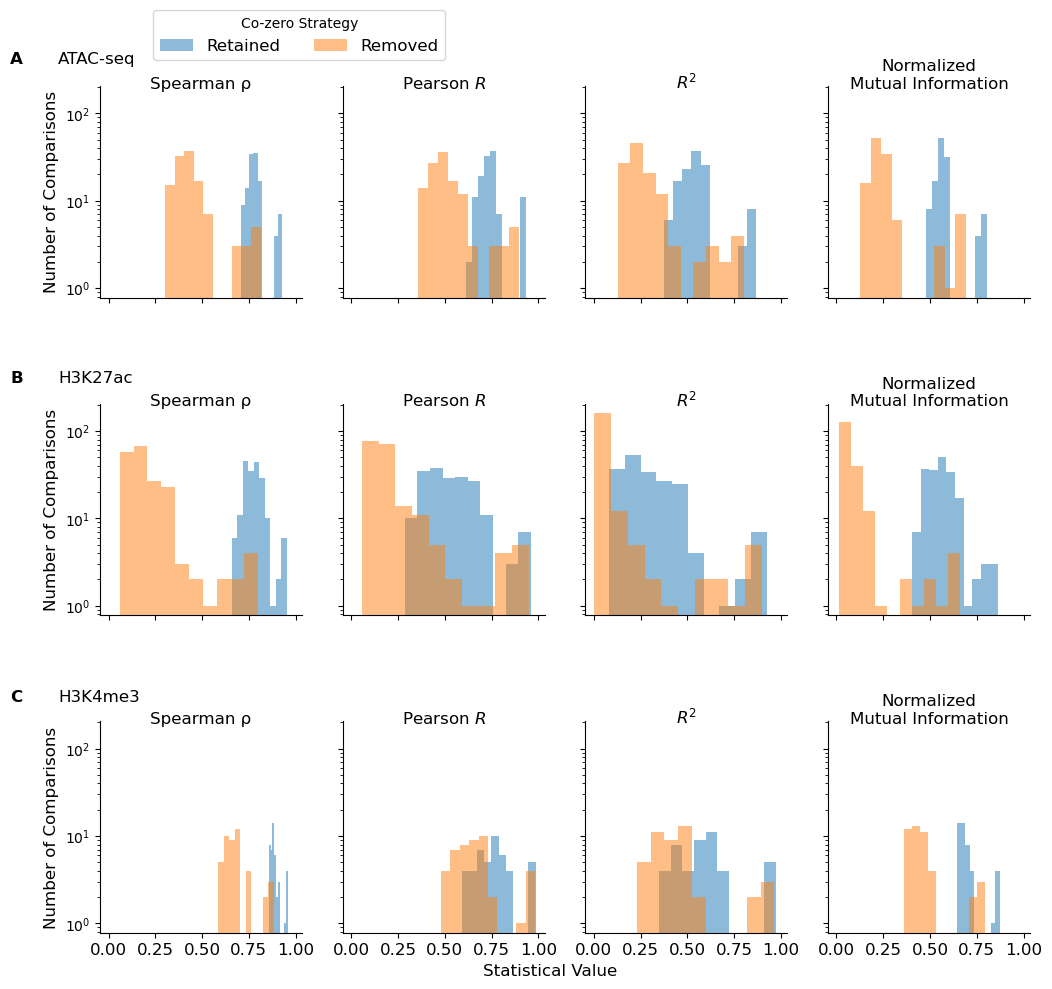

In [9]:
## Set the subplots, equal axis, with white background
fig,ax = plt.subplots(3,4,figsize=(12,11),sharex=True,sharey=True)
fig.set_facecolor('w')

## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    ## Iterate thru the stats 
    for i,s in enumerate(stats):
        ## Set the axis 
        plt.sca(ax[rix,i])
        
        ## Turn off the top and right spoines
        [ax[rix,i].spines[b].set_visible(False) for b in ('top','right')]
    
        ## Set the title
        plt.title(stat_label_dict[s],fontsize=12,y=0.95)
        
        ## Set y-axis label 
        plt.ylabel('Number of Comparisons' if i == 0 else None,fontsize=12)
        
        ## Gather the x and y 
        x = results[(results.Cozero==False)][s].values
        y = results[(results.Cozero==True) ][s].values
        
        ## Format a label boolean
        tolabel = (rix + i) == 0
        
        ## Plot the histograms 
        plt.hist(x,alpha=0.5,log=True,label='Retained' if tolabel else None)
        plt.hist(y,alpha=0.5,log=True,label='Removed' if tolabel else None)
        
        if tolabel:
            plt.legend(ncol=2,title='Co-zero Strategy',fontsize=12,bbox_to_anchor=(1.75,1.4))
        
        ## Modify the xticks 
        plt.xticks(np.arange(0,1.25,0.25),fontsize=12)

## Modify spacing 
plt.subplots_adjust(hspace=0.5)

## Add the section labels
[fig.text(x=0.05,y=0.90-(i*0.29),s=s,fontsize=12,fontweight='bold') for i,s in enumerate(('A','B','C'))]

## Add lables of experment type
[fig.text(x=0.09,y=0.9-(i*0.29),s=s,fontsize=12) for i,s in enumerate(('ATAC-seq','H3K27ac','H3K4me3'))];

## Annotate the x-axis
fig.text(x=0.5,y=0.075,s='Statistical Value',fontsize=12,va='center',ha='center')

## Save the figure 
savepath = None #'../FIGURES/Supplementary.Figure.6.new.png'

## If we are saving, save
if savepath:
    plt.savefig(savepath,dpi=600,bbox_inches='tight')

In [10]:
## Set the cut off for significants
cutoff = 0.05/(12*3)
cutoff

0.001388888888888889

In [11]:
## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    ## Iterate thru the stats 
    for i,s in enumerate(stats):
        
        x = results[(results.Cozero==False)][s].values
        y = results[(results.Cozero==True) ][s].values
        
        w,p = ss.wilcoxon(x,y)
        
        print(p,p<cutoff)

1.9719517121524354e-21 True
1.9719517121524354e-21 True
1.9719517121524354e-21 True
1.9719517121524354e-21 True
6.262919771371905e-33 True
6.262919771371905e-33 True
6.262919771371905e-33 True
6.262919771371905e-33 True
5.684341886080802e-14 True
5.684341886080802e-14 True
5.684341886080802e-14 True
5.684341886080802e-14 True


In [12]:
## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    ## Iterate thru the stats 
    for i,s in enumerate(stats):        
        
        ## Iterate thru the 
        b = True
        ## Gather the x and y 
        x = results[(results.Cozero==False) & (results.Isrep==b)][s].values
        y = results[(results.Cozero==True)  & (results.Isrep==b)][s].values
        
        w,p = ss.wilcoxon(x,y)
        
        print(len(x),p,p<cutoff)

11 0.0009765625 True
11 0.0009765625 True
11 0.0009765625 True
11 0.0009765625 True
10 0.001953125 False
10 0.001953125 False
10 0.001953125 False
10 0.001953125 False
5 0.0625 False
5 0.0625 False
5 0.0625 False
5 0.0625 False


In [13]:
## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    ## Iterate thru the stats 
    for i,s in enumerate(stats):        
        
        ## Iterate thru the 
        b = False
        ## Gather the x and y 
        x = results[(results.Cozero==False) & (results.Isrep==b)][s].values
        y = results[(results.Cozero==True)  & (results.Isrep==b)][s].values
        
        w,p = ss.wilcoxon(x,y)
        
        print(len(x),p,p<cutoff,p<1**-19)

109 1.2785723680814605e-19 True True
109 1.2785723680814605e-19 True True
109 1.2785723680814605e-19 True True
109 1.2785723680814605e-19 True True
180 2.7348870910495993e-31 True True
180 2.7348870910495993e-31 True True
180 2.7348870910495993e-31 True True
180 2.7348870910495993e-31 True True
40 1.8189894035458565e-12 True True
40 1.8189894035458565e-12 True True
40 1.8189894035458565e-12 True True
40 1.8189894035458565e-12 True True


In [14]:
## Reset the stat lables, make sure the match above 
new_stat_labels = ['Spearman '+ '$\rho$', 'Pearson $R$', '$R^2$', 'Normalized Mutual Information']

## Form into a dictionary
new_stat_label_dict = dict(zip(stats,new_stat_labels))

In [15]:
## Make a list of diff of means 
diff_in_means = []

## Iterate thru the dataframes 
for rix, (experi, results) in enumerate(comb.groupby('Experiment')):
    
    ## Iterate thru the stats 
    for i,s in enumerate(stats):
        ## Initilize diff list 
        diff_list = []
        ## Gather the cozeros 
        for cz in (False,True):
            a = results[(results.Cozero==cz) & (results.Isrep==True) ][s].values
            b = results[(results.Cozero==cz) & (results.Isrep==False)][s].values
        
            ## Calc diff of mean
            d = round(np.mean(a) - np.mean(b),2)
            
            ## append the diff 
            diff_list.append(d)
            
        ## make a list of resluts
        stat_res = [experi,s] + diff_list
        
        ## Append resluts 
        diff_in_means.append(stat_res)
        
## make into a dataframe
diff_in_means = pd.DataFrame(diff_in_means,columns=['Assay','Statistic','Differnce in Means (with Co-zeros)','Difference in Means (without Co-zeros)']).sort_values('Statistic')

## Re-define the experiment
diff_in_means.Assay= diff_in_means.Assay.replace({'ATAC':'ATAC-seq'})

## Replace the statisc
diff_in_means.Statistic = diff_in_means.Statistic.replace(new_stat_label_dict)

## Sort by the assay
diff_in_means.sort_values(diff_in_means.columns[0],inplace=True)

In [16]:
## Save out the table
diff_in_means.to_csv('../DATA/S.table.3.csv',index=False)

## Print to screen
diff_in_means

,Assay,Statistic,Differnce in Means (with Co-zeros),Difference in Means (without Co-zeros)
3,ATAC-seq,Normalized Mutual Information,0.22,0.40
1,ATAC-seq,Pearson $R$,0.19,0.34
2,ATAC-seq,$R^2$,0.32,0.45
0,ATAC-seq,Spearman $\rho$,0.14,0.34
7,H3K27ac,Normalized Mutual Information,0.23,0.47
5,H3K27ac,Pearson $R$,0.41,0.69
6,H3K27ac,$R^2$,0.58,0.71
4,H3K27ac,Spearman $\rho$,0.15,0.49
11,H3K4me3,Normalized Mutual Information,0.18,0.32
9,H3K4me3,Pearson $R$,0.23,0.32


In [17]:
if sum(diff_in_means.T.values[-1] - diff_in_means.T.values[-2] > 0) == diff_in_means.shape[0]:
    print("All the differences in means (between replicates and non-replicates increased.")

All the differences in means (between replicates and non-replicates increased.
